In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator # 버전 문제
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import Initialize
import matplotlib.pyplot as plt

In [3]:
#parameter 정의
a_true = np.sqrt(0.7)
b_true = np.sqrt(0.3)
theta_true = np.pi/4

initial_state = [a_true, b_true * np.exp(1j * theta_true)]

init_gate = Initialize(initial_state)
init_gate.label = "init"
print(f"실제 값: a = {a_true:.4f}, b = {b_true:.4f}, theta = {theta_true:.4f} (radians)")

실제 값: a = 0.8367, b = 0.5477, theta = 0.7854 (radians)


     ┌──────────────────────────────┐┌─┐
  q: ┤ init(0.83666,0.3873+0.3873j) ├┤M├
     └──────────────────────────────┘└╥┘
c: 1/═════════════════════════════════╩═
                                      0 


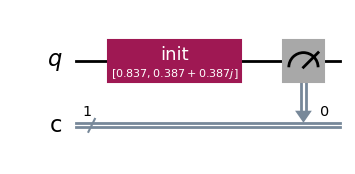

In [4]:
qc_z = QuantumCircuit(1, 1)
qc_z.append(init_gate, [0])
qc_z.measure(0, 0)

print(qc_z)
qc_z.draw("mpl")


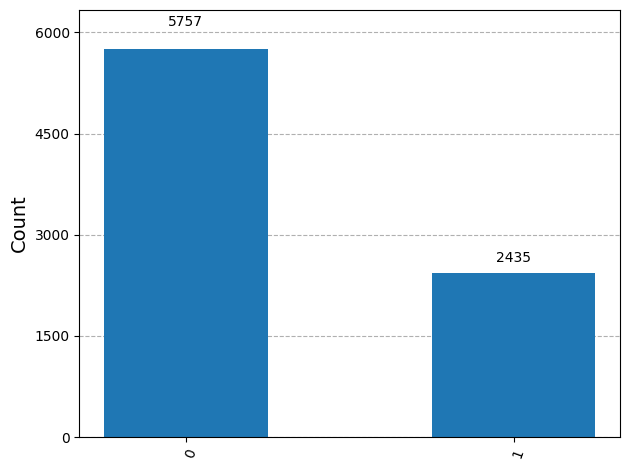

In [5]:
simulator = AerSimulator()
shots = 8192
t_qc_2 = transpile(qc_z, simulator)
job_z = simulator.run(t_qc_2, shots=shots)
counts_z = job_z.result().get_counts()

plot_histogram(counts_z)

In [6]:
#a, b 계산
a = np.sqrt(counts_z['0'] / shots)
b = np.sqrt(counts_z['1'] / shots)
a, b

(np.float64(0.8383070971085119), np.float64(0.5451983225739969))

In [7]:
qc_x = QuantumCircuit(1, 1)
qc_x.append(init_gate, [0])
qc_x.h(0)
qc_x.measure(0, 0)

print(qc_x)

     ┌──────────────────────────────┐┌───┐┌─┐
  q: ┤ init(0.83666,0.3873+0.3873j) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0 


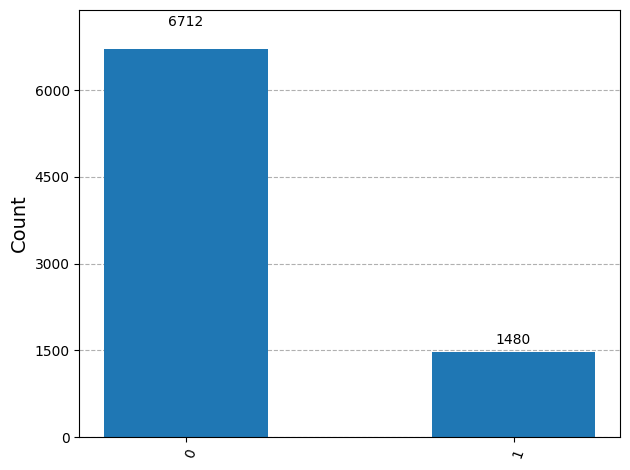

In [8]:
t_qc_x = transpile(qc_x, simulator)
job_x = simulator.run(t_qc_x, shots=shots)
counts_x = job_x.result().get_counts()
plot_histogram(counts_x)

In [9]:
#cos theta 계산
cos_measured = (2 * counts_x['0'] / shots - 1) / (2 * a * b)

print(f"추정된 cos theta: {cos_measured:.4f}")
print(f"실제 cos theta: {np.cos(theta_true):.4f}")

추정된 cos theta: 0.6987
실제 cos theta: 0.7071


In [10]:
#y 방향에서 측정
qc_y = QuantumCircuit(1, 1)
qc_y.append(init_gate, [0])
qc_y.sdg(0)
qc_y.h(0)
qc_y.measure(0, 0)

print(qc_y)

     ┌──────────────────────────────┐┌─────┐┌───┐┌─┐
  q: ┤ init(0.83666,0.3873+0.3873j) ├┤ Sdg ├┤ H ├┤M├
     └──────────────────────────────┘└─────┘└───┘└╥┘
c: 1/═════════════════════════════════════════════╩═
                                                  0 


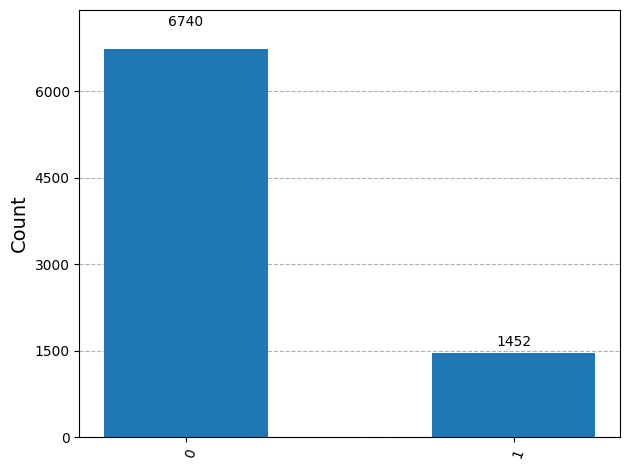

In [11]:
t_qc_y = transpile(qc_y, simulator)
job_y = simulator.run(t_qc_y, shots=shots)
counts_y = job_y.result().get_counts()
plot_histogram(counts_y)

In [12]:
#sin theta 계산
sin_measured = (2 * counts_y['0'] / shots - 1) / (2 * a * b)

print(f"추정된 sin theta: {sin_measured:.4f}")
print(f"실제 sin theta: {np.sin(theta_true):.4f}")

추정된 sin theta: 0.7062
실제 sin theta: 0.7071


In [13]:
theta_measured = np.arctan2(sin_measured, cos_measured)

print("--- 최종 추정 결과 ---")
print(f"a: 측정값={a:.4f}, 실제값={a_true:.4f}")
print(f"b: 측정값={b:.4f}, 실제값={b_true:.4f}")
print(f"theta: 측정값={theta_measured:.4f}, 실제값={theta_true:.4f}")

--- 최종 추정 결과 ---
a: 측정값=0.8383, 실제값=0.8367
b: 측정값=0.5452, 실제값=0.5477
theta: 측정값=0.7907, 실제값=0.7854


Problem 2 : Generic two qubit quantum state


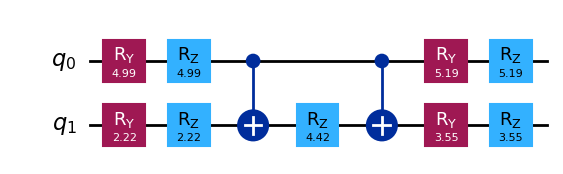

In [14]:
def create_2q_target_circuit(qc_data):
    qc = QuantumCircuit(2)
    for i in range(2):
        qc.ry(qc_data[2*i+1], i)
        qc.rz(qc_data[2*i+1], i)
    qc.cx(0, 1)
    qc.rz(qc_data[4], 1)
    qc.cx(0, 1)
    for i in range(2):
        qc.ry(qc_data[4+2*i+1], i)
        qc.rz(qc_data[4+2*i+1], i)
    return qc

random_vec = np.random.rand(9)*2.0*np.pi
U_hidden = create_2q_target_circuit(random_vec)
U_hidden.draw('mpl')

In [15]:
backend = Aer.get_backend('aer_simulator')
qc1 = U_hidden.copy()
qc2 = QuantumCircuit(2)

NameError: name 'Aer' is not defined